In [1]:
import cv2 as cv
import numpy as np
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt

2022-10-08 20:49:46.647105: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-08 20:49:46.824853: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aarav/Downloads/college/lib/python3.9/site-packages/cv2/../../lib64:
2022-10-08 20:49:46.824871: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-08 20:49:46.854318: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has

In [2]:
train_set = pd.read_csv('MNIST/mnist_train.csv').values
test_set  = pd.read_csv('MNIST/mnist_test.csv').values

In [3]:
X_train = train_set[:,1:]
y_train = train_set[:,:1]

X_train = np.reshape(X_train, (60000,28,28,1))

X_train = X_train/255.

In [4]:
X_test = test_set[:,1:]
y_test = test_set[:,:1]

X_test = np.reshape(X_test, (10000,28,28,1))

X_test = X_test/255.

#CNN Architecture Building

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [8]:
model = Sequential()

model.add(Conv2D(28, kernel_size = (3,3), input_shape = (28,28,1)))
model.add(Conv2D(28, kernel_size = (3,3)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(28, kernel_size = (3,3)))
model.add(Conv2D(28, kernel_size = (3,3)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128, activation = tf.nn.relu))
model.add(Dropout(0.2))

model.add(Dense(10, activation = tf.nn.softmax))

model.compile( optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

2022-10-08 20:50:22.054463: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aarav/Downloads/college/lib/python3.9/site-packages/cv2/../../lib64:
2022-10-08 20:50:22.054821: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-08 20:50:22.054882: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (aarav-GF63-Thin-9SCXR): /proc/driver/nvidia/version does not exist
2022-10-08 20:50:22.056100: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.fit(x = X_train, y = y_train, epochs = 7)

Epoch 1/7
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1625 - accuracy: 0.9509
Epoch 2/7
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0635 - accuracy: 0.9804
Epoch 3/7
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0524 - accuracy: 0.9840
Epoch 4/7
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0458 - accuracy: 0.9859
Epoch 5/7
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0376 - accuracy: 0.9883
Epoch 6/7
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0351 - accuracy: 0.9890
Epoch 7/7
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0316 - accuracy: 0.9904


In [10]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0348 - accuracy: 0.9901


[0.03479567915201187, 0.9901000261306763]

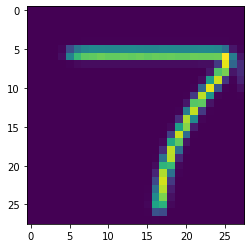

1/1 [==============================] - 0s 16ms/step
This image is of a: 7
1/1 [==============================] - 0s 21ms/step


In [18]:
img = cv.imread('Test/seven.png')
gray = cv.cvtColor(img , cv.COLOR_BGR2GRAY)

gray = gray/255.
gray = 1. - gray 

gray = cv.resize( gray , (28,28))

plt.imshow(gray)
plt.show()

gray = np.reshape(gray, (1,28,28,1))

print ("This image is of a:",np.argmax(model.predict(gray)))
result = model.predict(gray)

In [19]:
ref = 0
for i in result[0]:
    print(i,ref)
    ref += 1

1.1847805e-08 0
0.0007380114 1
1.45491185e-05 2
1.1554582e-08 3
2.1954614e-08 4
5.4302344e-08 5
4.011558e-11 6
0.9992472 7
4.2162687e-10 8
2.0759083e-07 9


In [20]:
np.argmax(result)

7

In [25]:
#plt.imshow(gray)

In [26]:
temp_img = np.reshape(train_set[0][1:], (28,28))

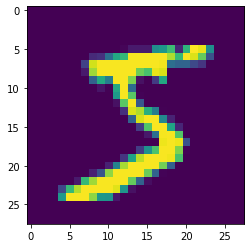

In [27]:
plt.imshow(temp_img)

In [28]:
temp_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [29]:
(X_train, y_train), (X_test, y_test) =  tf.keras.datasets.mnist.load_data()

In [30]:
X_test.shape

(10000, 28, 28)

In [31]:
y_test.shape

(10000,)

Save Model/Weights

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 28)        7084      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 28)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 28)        7084      
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 28)          7084      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 28)         0         
 2D)                                                    

In [32]:
model.save('CNN_7Epoch.h5')